In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1)

In [15]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

In [16]:
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

In [17]:
x_train =  train_df.drop(['date_time', 'number_of_rentals'], axis=1)
y_train = train_df['number_of_rentals']

x_test =  test_df.drop(['date_time'], axis=1)

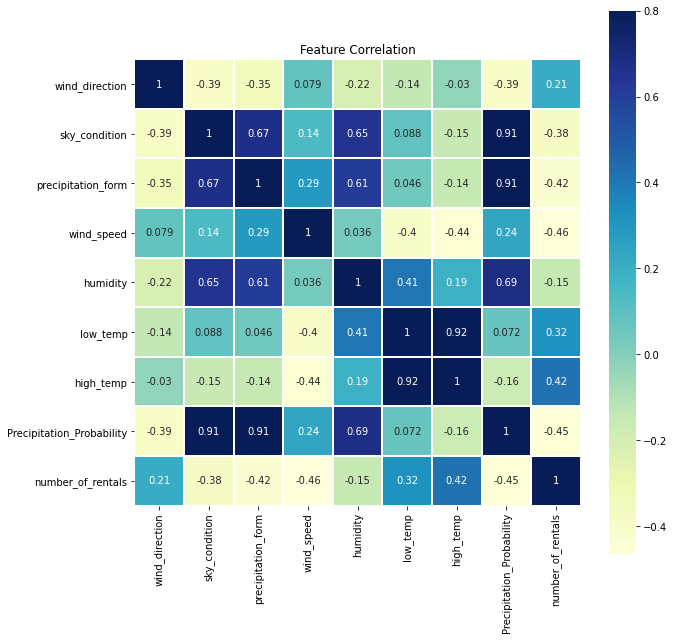

In [18]:
corr = train_df.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

In [ ]:
train_df.drop(['wind_direction', 'humidity'], axis=1, inplace=True)
test_df.drop(['wind_direction', 'humidity'], axis=1, inplace=True)

In [ ]:
train_df.drop(['humidity'], axis=1, inplace=True)
test_df.drop(['humidity'], axis=1, inplace=True)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

x_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_train)
x_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_test)

#### RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_train)

nmae = np.mean(abs(y_pred - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

모델 NMAE: 0.0


#### XGBClassifier

In [ ]:
from xgboost import XGBRegressor

xgb_clf = XGBRegressor(n_estimators=5)
xgb_clf.fit(x_train, y_train)

y_pred = xgb_clf.predict(x_train)

nmae = np.mean(abs(y_pred - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

In [ ]:
xgb_clf = XGBRegressor(n_estimators=5)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_train)

nmae = np.mean(abs(y_pred - y_train) / y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

In [22]:
submission  = pd.read_csv('dataset/sample_submission.csv')
submission

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0
...,...,...
86,2021-06-26,0
87,2021-06-27,0
88,2021-06-28,0
89,2021-06-29,0


In [23]:
submission  = pd.read_csv('dataset/sample_submission.csv')

y_pred = rf_clf.predict(x_test)
y_pred = y_pred.round()
submission['number_of_rentals'] = y_pred

In [24]:
submission

,date_time,number_of_rentals
0,2021-04-01,39036
1,2021-04-02,79583
2,2021-04-03,2833
3,2021-04-04,26484
4,2021-04-05,60925
...,...,...
86,2021-06-26,67346
87,2021-06-27,36945
88,2021-06-28,63032
89,2021-06-29,63032


In [25]:
submission.to_csv('four.csv', index= False)